<a href="https://colab.research.google.com/github/CodeHunterOfficial/Data-Mining-2024/blob/master/%D0%A7%D0%B0%D1%81%D1%82%D1%8C%204.%20ML/02.LinearModels.Classification/lecture-notes/Lecture_2_2_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Метод опорных векторов




**Основные обозначения**

Рассматривается задача обучения по прецедентам $(X, Y, y^*, X^ℓ)$, где:
- $X$ - пространство объектов;
- $Y$ - множество ответов;
- $y^* : X \to Y$ - целевая зависимость, значения которой известны только на объектах обучающей выборки $X^ℓ = \{(x_i, y_i)\}^{ℓ}_{i=1}$, где $y_i = y^*(x_i)$;
- Требуется построить алгоритм $a: X \to Y$, аппроксимирующий целевую зависимость $y^*$ на всем пространстве $X$.

## Метод опорных векторов в задачах классификации

Рассмотрим задачу классификации на два непересекающихся класса, в которой
объекты описываются n-мерными вещественными векторами:
$X = R^n, Y =\{−1, +1\}$.
Будем строить линейный пороговый классификатор:
$$a(x)=sign(\sum_{j=1}^{n}w_jx^j-w_0)=sign (\langle w,x \rangle - -w_0)        
  \qquad \qquad \qquad(1)$$


где $x = (x^1,... ,x^n)$
 — признаковое описание объекта $x$; вектор $w = (w_1
,... ,w_n
) ∈ R^n$
и скалярный порог $w_0 ∈ R$ являются параметрами алгоритма.
Уравнение $⟨w,x ⟩ = w_0$ описывает гиперплоскость, разделяющую классы в пространстве $R^n$.
Хотя правило классификации в точности совпадает с моделью нейрона
по МакКаллоку-Питтсу, критерий и методы настройки параметров в SVM радикально отличаются от персептронных (градиентных) методов обучения.

### Понятие оптимальной разделяющей гиперплоскости

Предположим, что выборка линейно разделима, то есть существуют такие значения параметров $w, w_0$, при которых функционал числа ошибок

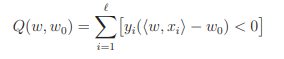

принимает нулевое значение. Но тогда разделяющая гиперплоскость не единственна, поскольку существуют и другие положения разделяющей гиперплоскости, реализующие то же самое разбиение выборки. Идея метода заключается в том, чтобы
разумным образом распорядиться этой свободой выбора. Потребуем, чтобы разделяющая гиперплоскость максимально далеко отстояла от ближайших к ней точек обоих
классов. Первоначально данный принцип классификации возник из эвристических
соображений: вполне естественно полагать, что максимизация зазора (margin) между классами должна способствовать более уверенной классификации. В дальнейшем
этот принцип получил мощное теоретическое обоснование

**Нормировка**. Заметим, что параметры линейного порогового классификатора определены с точностью до нормировки: алгоритм $a(x)$ не изменится, если w и w0 одновременно умножить на одну и ту же положительную константу. Удобно выбрать константу таким образом, чтобы для всех пограничных (т. е. ближайших к разделяющей гиперплоскости) объектов $x_i$ из $X^ℓ$ выполнялись условия:
$$\langle w,x_i⟩ − w_0 = y_i$$

Сделать это возможно, поскольку при оптимальном положении разделяющей гиперплоскости все пограничные объекты находятся от неё на одинаковом расстоянии.
Остальные объекты находятся дальше. Таким образом, для всех $x_i ∈ X^ℓ$

$$\langle w,x_i⟩-w_0  =
 \begin{cases}
    ≤ -1, &\text{если  $y_i=-1$}\\
   ≥1, &\text{если $y_i=+1$}
 \end{cases} \qquad \qquad (2)
 $$

Условие $−1 < \langle w,x ⟩ − w_0 < 1$ задаёт полосу, разделяющую классы. Ни одна из точек обучающей выборки не может лежать внутри этой полосы. Границами полосы
служат две параллельные гиперплоскости с направляющим вектором w. Точки, ближайшие к разделяющей гиперплоскости, лежат в точности на границах полосы. При
этом сама разделяющая гиперплоскость проходит ровно по середине полосы.


**Ширина разделяющей полосы**. Чтобы разделяющая гиперплоскость как можно
дальше отстояла от точек выборки, ширина полосы должна быть максимальной.
Пусть $x_{−}$ и $x_{+}$ — две произвольные точки классов −1 и +1 соответственно, лежащие
на границе полосы. Тогда ширина полосы есть

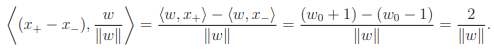

Ширина полосы максимальна, когда норма вектора w минимальна.
Итак, в случае, когда выборка линейно разделима, достаточно простые геометрические соображения приводят к следующей задаче: требуется найти такие значения параметров w и w0, при которых норма вектора w минимальна при условии (2). Это задача квадратичного программирования. Она будет подробно рассмотрена в следующем разделе. Затем будет сделано обобщение на тот случай, когда
линейной разделимости нет

### Линейно разделимая выборка

Построение оптимальной разделяющей гиперплоскости сводится к минимизации квадратичной формы при $ℓ$ ограничениях-неравенствах вида (2) относительно $n + 1$ переменных $w, w_0$:


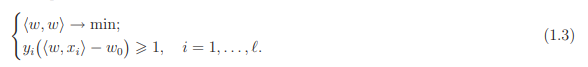

По теореме Куна-Таккера эта задача эквивалентна двойственной задаче поиска
седловой точки функции Лагранжа:

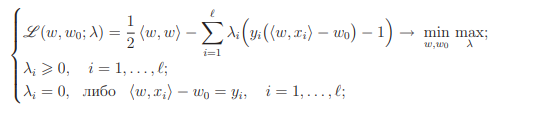

Ширина полосы максимальна, когда норма вектора w минимальна.
Итак, в случае, когда выборка линейно разделима, достаточно простые геометрические соображения приводят к следующей задаче: требуется найти такие значения параметров $w$ и $w_0$, при которых норма вектора w минимальна при условии (2). Это задача квадратичного программирования. Она будет подробно рассмотрена в следующем разделе. Затем будет сделано обобщение на тот случай, когда линейной разделимости нет

### Линейно разделимая выборка

Построение оптимальной разделяющей гиперплоскости сводится к минимизации квадратичной формы при $ℓ$ ограничениях-неравенствах вида (2) относительно n + 1 переменных $w, w_0$:


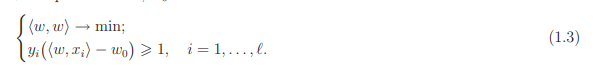

По теореме Куна-Таккера эта задача эквивалентна двойственной задаче поиска
седловой точки функции Лагранжа:


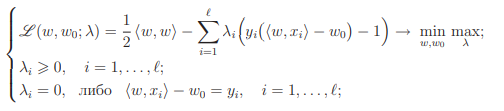

где $λ = (λ_1,... ,λ_ℓ)$ — вектор двойственных переменных. Последнее из трёх условий
называется условием дополняющей нежёсткости.
Необходимым условием седловой точки является равенство нулю производных
Лагранжиана. Отсюда немедленно вытекают два полезных соотношения

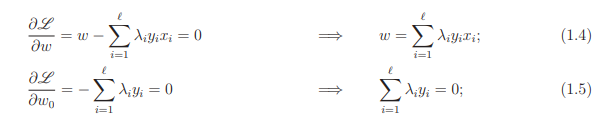

Из (1.4) следует, что искомый вектор весов w является линейной комбинацией
векторов обучающей выборки, причём только тех, для которых $λ_i \neq 0$. Согласно
условию дополняющей нежёсткости на этих векторах xi ограничения-неравенства
обращаются в равенства: $⟨ w,x_i  \rangle − w_0 = y_i$
, следовательно, эти векторы находятся
на границе разделяющей полосы. Все остальные векторы отстоят дальше от границы,
для них $λ_i = 0$, и они не участвуют в сумме (1.4). Алгоритм (1.1) не изменился бы,если бы этих векторов вообще не было в обучающей выборке

**Опр. 1.1.** Если $λ_i > 0$  и $\langle w,x)i ⟩ − w_0 = y_i$
, то объект обучающей выборки xi называется опорным вектором (support vector).
Подставляя (1.4) и (1.5) обратно в Лагранжиан, получим эквивалентную задачу
квадратичного программирования, содержащую только двойственные переменные:


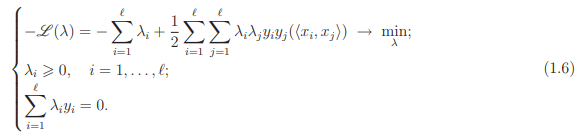

Здесь минимизируется квадратичный функционал, имеющий неотрицательно
определённую квадратичную форму, следовательно, выпуклый. Область, определяемая ограничениями неравенствами и одним равенством, также выпуклая. Следовательно, данная задача имеет единственное решение.
Допустим, мы решили эту задачу. Тогда вектор w вычисляется по формуле
(1.4). Для определения порога $w_0$ достаточно взять произвольный опорный вектор xi
и выразить $w_0$ из равенства $w_0 = \langle w,x_i \rangle −y_i$
. На практике для повышения численной
устойчивости рекомендуется брать в качестве $w_0$ среднее по всем опорным векторам, а ещё лучше медиану:

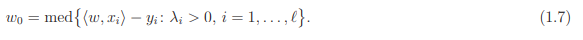

В итоге алгоритм классификации может быть записан в следующем виде:

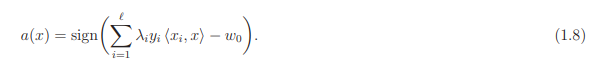

Обратим внимание, что реально суммирование идёт не по всей выборке, а только по опорным векторам, для которых $λ_i \neq 0$. Именно это свойство разреженности
(sparsity) отличает SVM от других линейных разделителей — дискриминанта Фишера, логистической регрессии и однослойного персептрона.

Резюмируя, отметим, что пока остаются открытыми два вопроса: как быть,
если классы линейно не разделимы, и как решить двойственную задачу (1.6)?

Начнём с первого вопроса. В следующем разделе рассматривается обобщение
двойственной задачи на случай отсутствия линейной разделимости. После этого будет рассмотрен переход от скалярных произведений к произвольным ядрам — так
называемый «kernel trick», позволяющий строить нелинейные разделители

### Линейно неразделимая выборка

Чтобы обобщить SVM на случай линейной неразделимости, позволим алгоритму допускать ошибки на обучающих объектах, но при этом постараемся, чтобы ошибок было поменьше. Введём набор дополнительных переменных $ξ_i > 0$, характеризующих величину ошибки на объектах $x_i
, i = 1,... ,ℓ$. Возьмём за отправную точку
задачу (1.3); смягчим в ней ограничения-неравенства, и одновременно введём в минимизируемый функционал штраф за суммарную ошибку:

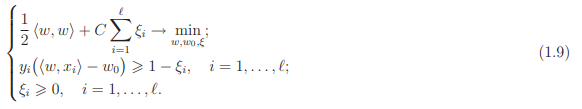

К этой же оптимизационной задаче приводит ещё одна цепочка рассуждений.
Вспомним, что в случае Y = {−1, +1} отступом (margin) объекта xi от границы
классов называется величина

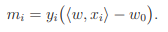

Алгоритм допускает ошибку на объекте xi тогда и только тогда, когда отступ mi
отрицателен. Если $m_i ∈ (−1, +1)$, то объект $x_i$ попадает внутрь разделяющей полосы.

Если $m_i > 1$, то объект $x_i$ классифицируется правильно, и находится на некотором
удалении от разделяющей полосы. Запишем функционал числа ошибок алгоритма a
на выборке $X_ℓ$ в терминах отступов:

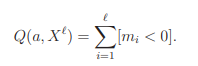

Заменим в этом функционале пороговую функцию потерь кусочно-линейной
верхней оценкой: $[m_i < 0] \leq (1 − m_i)_{+}$, как показано на Рис. 1. Смысл этой замены
в том, чтобы сделать функцию потерь чувствительной к величине ошибки и заодно
ввести штраф за приближение объекта к границе классов.

Кроме того, добавим к функционалу Q штрафное слагаемое $τ||w||^2$. В соответствии с принципом регуляризации некорректно поставленных задач по А. Н. Тихонову такая добавка означает, что среди всех векторов w, минимизирующих функционал Q, наиболее предпочтительны векторы с минимальной нормой. Регуляриза часто применяется для настройки линейных моделей классификации и регрессии.
При наличии шумовых и/или зависимых признаков она повышает устойчивость алгоритма по отношению к составу выборки и его обобщающую способность.
С учётом обеих модификаций функционал качества принимает вид:

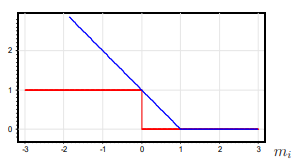

Рис. 1. Кусочно-линейная аппроксимация пороговой функции потерь: $[m_i < 0]\leq (1 − m_i)_{+}$.


С учётом обеих модификаций функционал качества принимает вид:


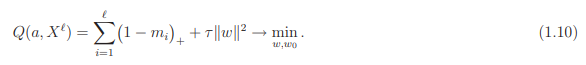

Нетрудно показать, что задача минимизации данного функционала эквивалентна оптимизационной задаче с ограничениями (1.9), если взять параметр регуляризации $τ = \frac{1}{2C}.$  Таким образом, принцип оптимальной разделяющей гиперплоскости
(или максимизации ширины разделяющей полосы) совпадает с принципом регуляризации по Тихонову.
Положительная константа C (или τ ) является управляющим параметром метода и позволяет находить компромисс между максимизацией разделяющей полосы
и минимизацией суммарной ошибки.
Вернёмся к задаче (1.9) и запишем её функцию Лагранжа:

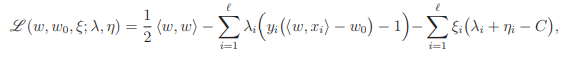

где $η = (η_1,... ,η_ℓ)$ — вектор переменных, двойственных к переменным $ξ = (ξ_1,... ,ξ_ℓ)$.
Как и в прошлый раз, условия Куна-Таккера сводят задачу к поиску седловой точки
функции Лагранжа:

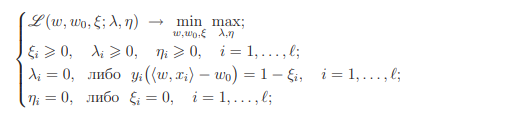

В последних двух строках записаны условия дополняющей нежёсткости. Необходимым условием седловой точки является равенство нулю производных Лагранжиана. Отсюда получаются три полезных соотношения:

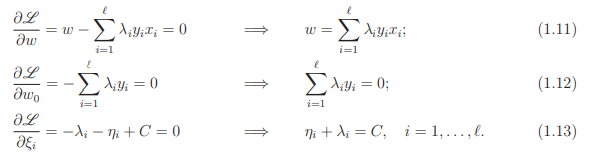

Первые два соотношения в точности такие же, как и в линейно разделимом
случае. Из третьего соотношения и неравенства $η_i \geq 0$ следует ограничение $λ_i \leq C$.
Отсюда, и из условий дополняющей нежёсткости вытекает, что возможны только
три допустимых сочетания значений переменных $ξ_i
, λ_i
, η_i$ и отступов $m_i$.

Соответственно, все объекты $x_i
, i = 1,... ,ℓ$ делятся на следующие три типа:

1. $λ_i = 0; η_i = C; ξ_i = 0; m_i > 1$.
Объект $x_i$ классифицируется правильно и находится далеко от разделяющей
полосы. Такие объекты будем называть периферийными.
2. $0 < λ_i < C; 0 < η_i < C; ξ_i = 0; m_i = 1.$
Объект xi классифицируется правильно и лежит в точности на границе разделяющей полосы. Такие объекты, как и раньше, будем называть опорными.
3. $λ_i = C; η_i = 0; ξ_i > 0; m_i < 1$.
Объект $x_i$ либо лежит внутри разделяющей полосы, но классифицируется правильно $(0 < ξ_i < 1, 0 < m_i < 1)$, либо попадает на границу классов $(ξ_i = 1, m_i = 0)$,
либо вообще относится к чужому классу $(ξ_i > 1, m_i < 0)$. Во всех этих случаях
объект $x_i$ будем называть нарушителем.


В силу соотношения (1.13) в Лагранжиане обнуляются все члены, содержащие
переменные $ξ_i$ и $η_i$
, и он принимает тот же вид, что и в случае линейной разделимости. Параметры разделяющей поверхности w и w0, согласно формулам (1.11) и (1.12),
также выражаются только через двойственные переменные $λ_i$
. Таким образом, задача снова сводится к квадратичному программированию относительно двойственных
переменных $λ_i$. Единственное отличие от линейно разделимого случая состоит в появлении ограничения сверху $λ_i \leq C$:

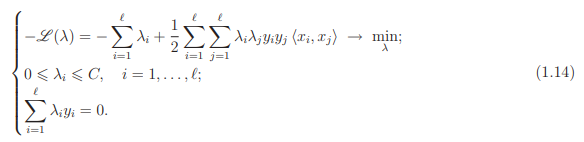

На практике для построения SVM решают именно эту задачу, а не (1.6), так как
гарантировать линейную разделимость выборки в общем случае не представляется
возможным. Этот вариант алгоритма называют SVM с мягким зазором (soft-margin
SVM), тогда как в линейно разделимом случае говорят об SVM с жёстким зазором
(hard-margin SVM).


Для алгоритма классификации сохраняется формула (1.8), с той лишь разницей, что теперь ненулевыми λi обладают не только опорные объекты, но и объектынарушители. В определённом смысле это недостаток SVM, поскольку нарушителями часто оказываются шумовые выбросы, и построенное на них решающее правило,
по сути дела, опирается на шум.

Константу C обычно выбирают по критерию скользящего контроля. Это трудоёмкий способ, так как задачу приходится решать заново при каждом значении C.
Если есть основания полагать, что выборка почти линейно разделима, и лишь
объекты-выбросы классифицируются неверно, то можно применить фильтрацию выбросов. Сначала задача решается при некотором C, и из выборки удаляется небольшая доля объектов, имеющих наибольшую величину ошибки $ξ_i$. После этого задача
решается заново по усечённой выборке. Возможно, придётся проделать несколько
таких итераций, пока оставшиеся объекты не окажутся линейно разделимыми.
